In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

In [3]:
df1 = pd.read_csv('data/liwccamoes.csv', index_col=0,sep=";")

In [4]:
df1

,titulo,autor,ano,genero,achieve,adverb,affect,anger,anx,article,...,social,space,swear,tentat,they,time,verb,we,work,you
id,,,,,,,,,,,,,,,,,,,,,
1,A virtude laureada,Manoel Maria de Barbosa du Bocage,1805,Drama,70,67,663,100,84,554,...,1126,600,140,303,161,143,258,3,50,722
2,Os Pobres,Raul Brandão,1906,Novel,74,177,603,99,63,789,...,1409,819,269,623,189,323,667,3,53,763
3,Raios de extincta luz,Antero de Quental,1892,Poetry,91,152,596,75,44,636,...,1156,743,232,471,143,261,496,3,73,650
4,Dispersão,Mário Sá-Carneiro,1914,Petry,113,131,538,70,64,366,...,759,590,145,349,99,250,456,0,35,325
5,Cantos Sagrados,Manuel de Arriaga,1899,Poetry,90,149,568,58,30,684,...,1235,916,214,433,187,269,402,14,90,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Auto da Índia,Gil Vicente,1509,Drama,112,207,465,114,27,199,...,1048,404,173,356,29,210,801,5,8,388
192,Farsa de Inês Pereira,Gil Vicente,1523,Drama,82,185,500,80,20,254,...,1220,346,230,354,54,177,691,2,63,465
193,A Cidade e a Infância,Luandino Vieira,1960,Tale,114,208,549,71,49,674,...,1386,906,334,397,206,530,733,4,123,719


In [7]:
y = df1.iloc[:,3].values

In [8]:
for x in Counter(y).most_common():
  print(x)

('Tale', 93)
('Novel', 25)
('Short story', 20)
('Chronicle', 16)
('Poetry', 13)
('Drama', 9)
('Essay', 8)
('Poem', 3)
('Petry', 1)
('Other', 1)
('Anthology', 1)
('Narrative', 1)
('Letter', 1)
('Memoirs', 1)
('Script', 1)
('Allegory', 1)


## Filtrando dados

In [9]:
df = df1[df1.genero.isin(["Tale", "Novel", "Short story", "Chronicle", "Poetry"])]

In [10]:
X = df.iloc[:,4:69].values
y = df.iloc[:,3].values

In [11]:
X

array([[ 74, 177, 603, ...,   3,  53, 763],
       [ 91, 152, 596, ...,   3,  73, 650],
       [ 90, 149, 568, ...,  14,  90, 742],
       ...,
       [155, 330, 672, ...,   5, 227, 587],
       [114, 208, 549, ...,   4, 123, 719],
       [107, 198, 529, ...,   6,  38, 608]])

In [12]:
for x in Counter(y).most_common():
  print(x)

('Tale', 93)
('Novel', 25)
('Short story', 20)
('Chronicle', 16)
('Poetry', 13)


## Machine Learning: Random Forests

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Chronicle       1.00      0.67      0.80         3
       Novel       0.50      0.20      0.29         5
      Poetry       0.75      1.00      0.86         3
 Short story       1.00      0.25      0.40         4
        Tale       0.72      0.95      0.82        19

    accuracy                           0.74        34
   macro avg       0.79      0.61      0.63        34
weighted avg       0.75      0.74      0.69        34



## Random Forests Hyperparameter tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [36]:
le = preprocessing.LabelEncoder()
rf = RandomForestClassifier(random_state = 42)

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [38]:
rf_random = GridSearchCV(
    estimator = rf, 
    param_grid = random_grid, 
    cv = 3, 
    verbose=1, 
    n_jobs = -1,
    scoring='f1_micro'
)

In [39]:
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             scoring='f1_micro', verbose=1)

In [40]:
rf_random.best_score_

0.6527056277056277

In [41]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

### Using best parameters

In [42]:
classifier = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=1000, 
    random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Chronicle       1.00      0.67      0.80         3
       Novel       0.50      0.20      0.29         5
      Poetry       0.75      1.00      0.86         3
 Short story       1.00      0.25      0.40         4
        Tale       0.72      0.95      0.82        19

    accuracy                           0.74        34
   macro avg       0.79      0.61      0.63        34
weighted avg       0.75      0.74      0.69        34



In [43]:
from sklearn.model_selection import cross_validate

In [44]:
scores = cross_validate(classifier, X, y, cv=5, scoring=['f1_micro', 'precision_micro', 'recall_micro'])

In [45]:
print(scores)

{'fit_time': array([1.90274048, 1.71694636, 1.71537495, 1.71443009, 1.70013452]), 'score_time': array([0.1410706 , 0.13937521, 0.14170551, 0.13882947, 0.14048481]), 'test_f1_micro': array([0.61764706, 0.67647059, 0.66666667, 0.72727273, 0.66666667]), 'test_precision_micro': array([0.61764706, 0.67647059, 0.66666667, 0.72727273, 0.66666667]), 'test_recall_micro': array([0.61764706, 0.67647059, 0.66666667, 0.72727273, 0.66666667])}


In [46]:
print("%0.2f f1 micro desvio: %0.2f" % (scores['test_f1_micro'].mean(), scores['test_f1_micro'].std()))
print("%0.2f prec micro desvio: %0.2f" % (scores['test_precision_micro'].mean(), scores['test_precision_micro'].std()))
print("%0.2f rec micro desvio: %0.2f" % (scores['test_recall_micro'].mean(), scores['test_recall_micro'].std()))

0.67 f1 micro desvio: 0.03
0.67 prec micro desvio: 0.03
0.67 rec micro desvio: 0.03


In [47]:
# features names
fn = list(df.columns[4:])

In [48]:
len(fn)

64

In [49]:
# class names
cn = []
for x in y:
  if x not in cn:
    cn.append(x)

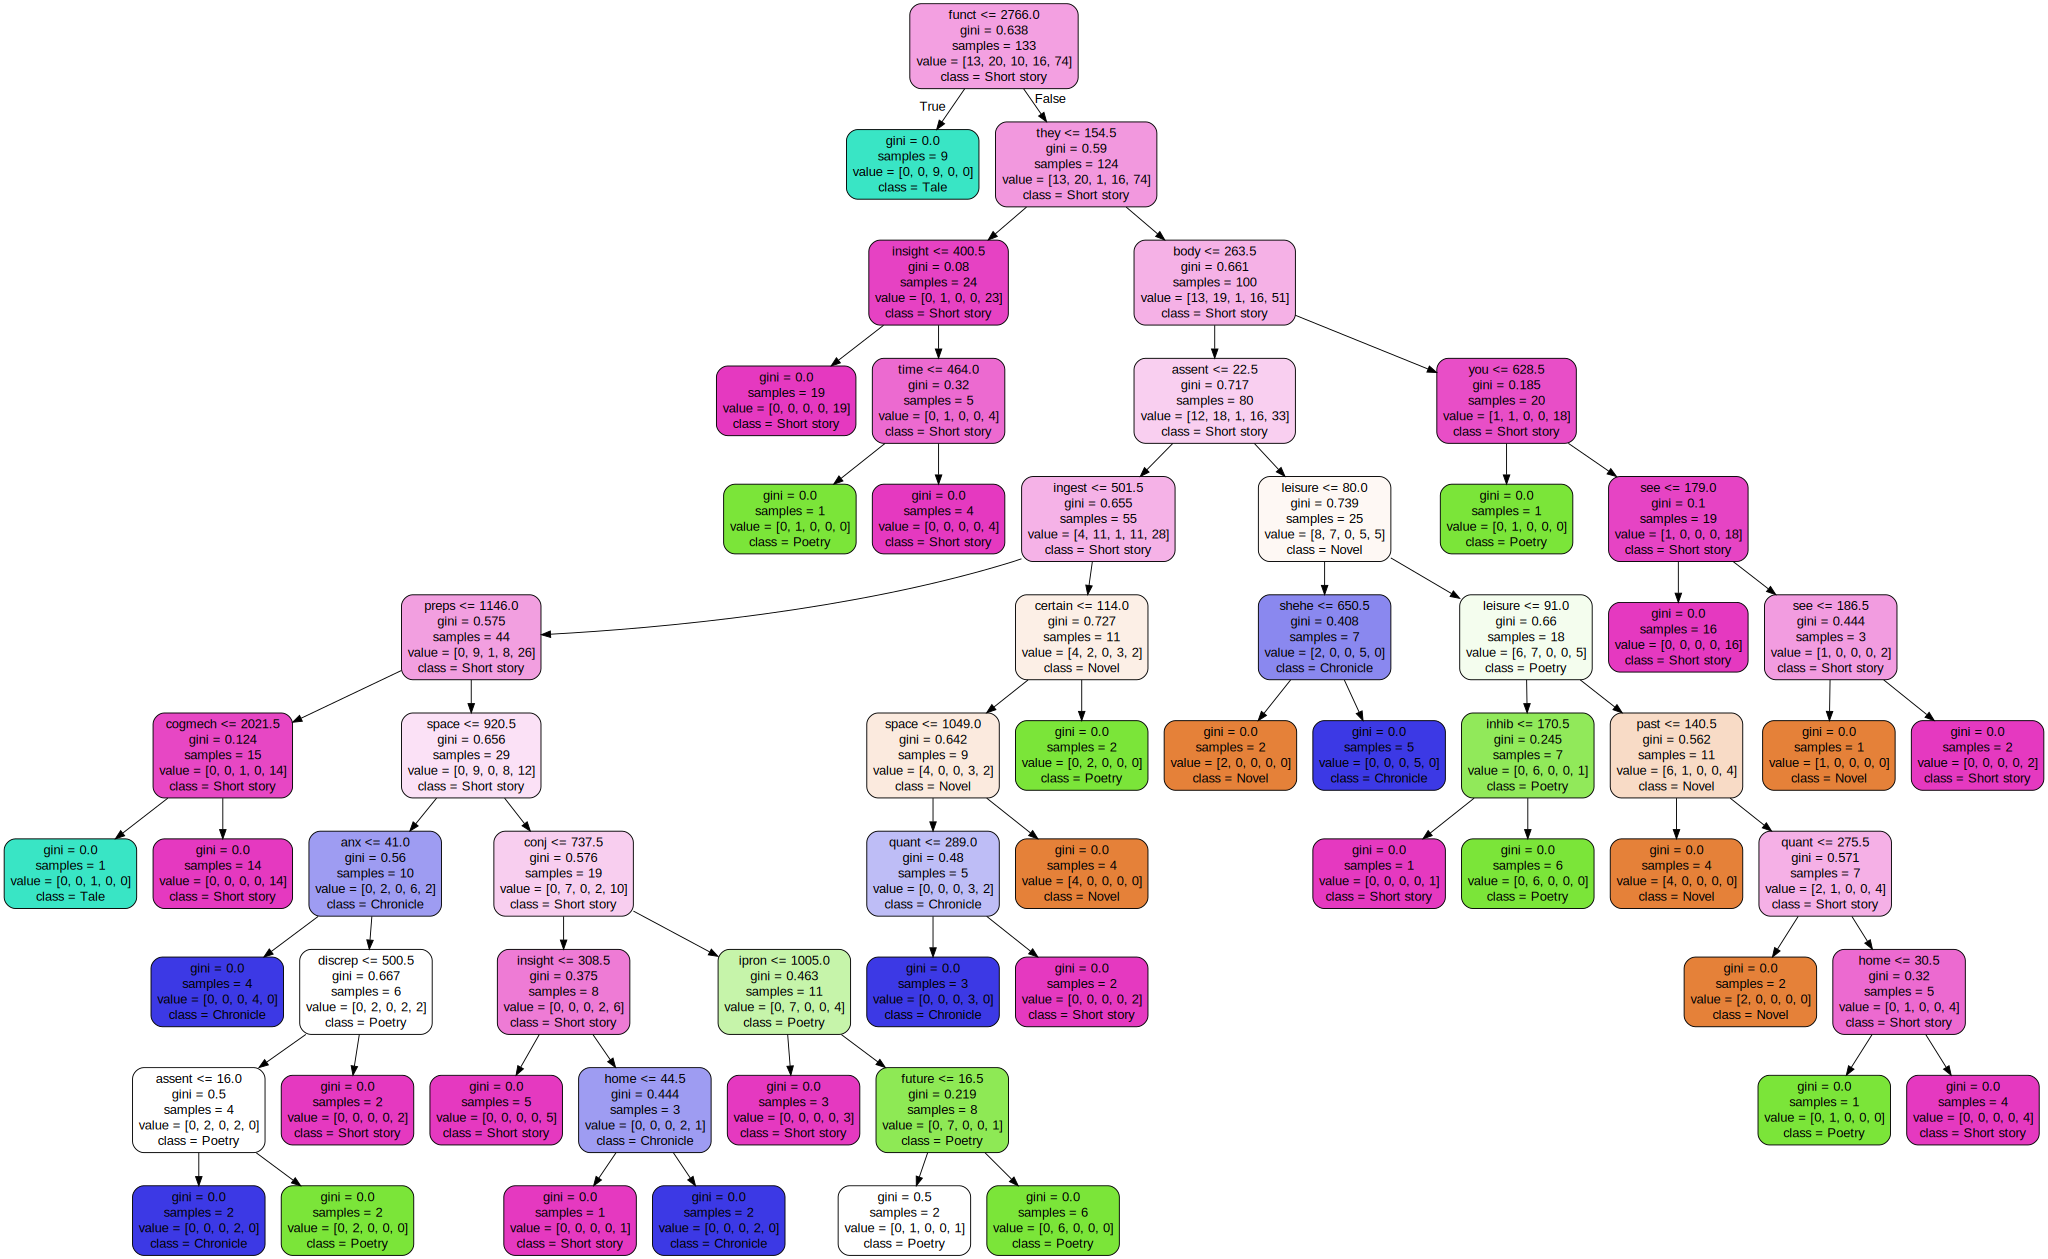

In [50]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier.estimators_[0], 
                           feature_names=fn,
                           class_names=cn, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph